In [24]:
import os
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
import json
import torch
from transformers import AutoModel, AutoTokenizer
import numpy as np
from transformers import BertModel, BertTokenizer
import glob
import pandas as pd

In [25]:
# Directories for input and output
input_dir = '/Users/shreya/Desktop/UniQbot/scraped_pages'
output_dir = '/Users/shreya/Desktop/UniQbot/clean_pages'
os.makedirs(output_dir, exist_ok=True)

In [26]:
def clean_html(html_content):
    # Parse the HTML
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Define tags to keep
    keep_tags = ['a', 'p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'div']
    
    # Find all tags
    all_tags = soup.find_all()
    
    # Iterate through tags in reverse to avoid problems when removing elements
    for tag in reversed(all_tags):
        # If tag is not in our keep list
        if tag.name not in keep_tags:
            # If it has content, replace the tag with its contents
            if hasattr(tag, 'contents'):
                tag.replace_with_children()
            else:
                tag.extract()
    
    # For <a> tags, make sure to only keep href attribute
    for a_tag in soup.find_all('a'):
        href = a_tag.get('href')
        # Remove all attributes
        a_tag.attrs = {}
        # Add back only href if it existed
        if href:
            a_tag['href'] = href
    
    # For all remaining tags, remove all attributes except href for <a>
    for tag in soup.find_all():
        if tag.name != 'a':
            tag.attrs = {}
    
    # Get the cleaned HTML
    cleaned_html = str(soup)
    
    # Optional: remove extra whitespace and empty lines
    cleaned_html = re.sub(r'\s+', ' ', cleaned_html)
    cleaned_html = re.sub(r'>\s+<', '><', cleaned_html)
    
    return cleaned_html

In [27]:
for filename in tqdm(os.listdir(input_dir)):
    if filename.endswith('.html'):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        with open(input_path, 'r', encoding='utf-8') as file:
            html_content = file.read()
        
        cleaned_html = clean_html(html_content)
        
        with open(output_path, 'w', encoding='utf-8') as file:
            file.write(cleaned_html)
        
        print(f"Cleaned {filename} successfully!")

  4%|█▋                                        | 14/356 [00:00<00:05, 66.46it/s]

Cleaned ogs_forms-and-guides_pre-opt-verification-for-graduate-students.html successfully!
Cleaned global-pathways_program_engineering-and-public-policy.html successfully!
Cleaned ogs_uscis-announces-i-765-application-fee-increases-effective-april-1-2024.html successfully!
Cleaned global-pathways_program_pharmacology-2.html successfully!
Cleaned ogs_forms-and-guides_address-update-form-for-students-on-stem-opt.html successfully!
Cleaned ogs_i-765-online.html successfully!
Cleaned ogs_current-students_understanding-visa-requirements_program-extention.html successfully!
Cleaned ogs_forms-and-guides_f-1-on-campus-employment-authorization.html successfully!
Cleaned ogs_forms-and-guides_j-1-scholar-virtual-drop-in-advising-instructions.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_traveling-as-a-j-1-scholar.html successfully!
Cleaned ogs_student-support_global-campuses_canada_housing-in-canada.html successfully!
Cleaned ogs_employment_on-campus-employment_stipended-gr

  8%|███▍                                      | 29/356 [00:00<00:04, 69.84it/s]

Cleaned ogs_current-students_leaving-northeastern.html successfully!
Cleaned ogs_current-students_important-updates_guidance-for-the-2022-2023-academic-year.html successfully!
Cleaned ogs_contact.html successfully!
Cleaned ogs_student-support_global-campuses_canada_living-in-canada.html successfully!
Cleaned gss_tutoring.html successfully!
Cleaned ogs_current-students_leaves.html successfully!
Cleaned global-pathways_student-support_housing.html successfully!
Cleaned ogs_post-u-s-election-travel-recommendations.html successfully!
Cleaned ogs_forms-and-guides_j-1-student-interns.html successfully!
Cleaned ogs_current-students_understanding-visa-requirements_final-term.html successfully!
Cleaned ogs_student-support.html successfully!
Cleaned ogs_student-support_global-campuses_canada_applying-for-a-study-permit.html successfully!
Cleaned ogs_student-support_global-campuses_canada_maintaining-student-status-in-canada.html successfully!
Cleaned global-pathways_student-support.html successf

 10%|████▎                                     | 37/356 [00:00<00:04, 72.72it/s]

Cleaned global-pathways_student-support_faculty-staff.html successfully!
Cleaned ogs_forms-and-guides_request-for-updated-i-20-while-on-stem-opt.html successfully!
Cleaned global-pathways_program_environmental-engineering.html successfully!
Cleaned global-pathways_program_finance.html successfully!
Cleaned ogs_current-students_traveling_executive-order.html successfully!
Cleaned ogs_forms-and-guides_cap-gap-i-20-request.html successfully!
Cleaned ogs_current-students_traveling_domestic-travel.html successfully!
Cleaned ogs_current-students_understanding-visa-requirements_transferring-out.html successfully!
Cleaned ogs_forms-and-guides_cpt-authorization-request-form.html successfully!
Cleaned ogs_current-students_leaves-of-absence_returning-from-a-non-medical-leave-of-absence.html successfully!
Cleaned ogs_new-students_arrival_online-immigration-clearance.html successfully!
Cleaned ogs_category_updates.html successfully!
Cleaned ogs_student-support_global-campuses_canada_health-insuranc

 15%|██████▎                                   | 53/356 [00:00<00:04, 72.31it/s]

Cleaned global-pathways_program_software-engineering-systems.html successfully!
Cleaned find-your-program.html successfully!
Cleaned index.html successfully!
Cleaned ogs_forms-and-guides_canadian-arrival-questionnaire.html successfully!
Cleaned ogs_new-students_arrival_banking-and-credit-cards.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_arrival-for-j-1-scholars.html successfully!
Cleaned ogs_employment_off-campus-employment_ssr-and-tps.html successfully!
Cleaned ogs_student-support_academic-services_academic-integrity.html successfully!
Cleaned ogs_housing.html successfully!
Cleaned ogs_forms-and-guides_canadian-study-permit-update.html successfully!
Cleaned ogs_visa-application.html successfully!
Cleaned ogs_current-students_important-updates.html successfully!
Cleaned ogs_employment_on-campus-employment_j-1-on-campus-employment.html successfully!
Cleaned global-pathways_program_energy-systems.html successfully!
Cleaned gss.html successfully!
Cleaned ogs_forms

 17%|███████▏                                  | 61/356 [00:00<00:04, 72.50it/s]

Cleaned ogs_student-support_academic-tools-tips.html successfully!
Cleaned ogs_forms-and-guides_out-of-country-request-form.html successfully!
Cleaned ogs_new-students_i-20-ds-2019-application_estimate-of-expenses-for-i-20-requests-2025-2026.html successfully!
Cleaned ogs_forms-and-guides_15676-2.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_visa-process-for-j-1-scholars.html successfully!
Cleaned global-pathways_campus-locations_student-experience.html successfully!


 21%|████████▉                                 | 76/356 [00:01<00:04, 56.26it/s]

Cleaned ogs_category_updates_page_2.html successfully!
Cleaned ogs_new-students_visa-application.html successfully!
Cleaned ogs_forms-and-guides_importance-urgency-matrix.html successfully!
Cleaned ogs_sevp-update-sign-and-send-i-983-electronically.html successfully!
Cleaned ogs_employment_24-month-stem-opt-extension-f1.html successfully!
Cleaned ogs_forms-and-guides_request-to-complete-stem-opt-sevis-record.html successfully!
Cleaned global-pathways_contact-us.html successfully!
Cleaned global-pathways_program_enterprise-intelligence.html successfully!
Cleaned ogs_student-support_global-campuses_canada_volunteering-in-canada.html successfully!
Cleaned ogs_forms-and-guides_non-medical-leave-of-absence-request.html successfully!
Cleaned ogs_current-students_understanding-visa-requirements_correcting-status.html successfully!
Cleaned ogs_sevis-contacts-for-j-1-exchange-visitors.html successfully!
Cleaned global-pathways_program_information-systems.html successfully!
Cleaned ogs_exchange-

 26%|██████████▋                               | 91/356 [00:01<00:04, 63.77it/s]

Cleaned ogs_student-support_resources_safety-scams.html successfully!
Cleaned ogs_semester-conversion-for-cps-graduate-programs.html successfully!
Cleaned ogs_forms-and-guides_data-form-for-non-nu-visa-sponsored-continuing-students.html successfully!
Cleaned global-pathways.html successfully!
Cleaned global-pathways_program_biomedical-science-2.html successfully!
Cleaned ogs_getting-started_paying-sevis-fee.html successfully!
Cleaned ogs_employment_other-topics.html successfully!
Cleaned ogs_getting-started_obtaining-i-94.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_guidelines-for-maintaining-j-1-scholar-status.html successfully!
Cleaned ogs_getting-started_dependents.html successfully!
Cleaned ogs_dhs-tip-sheet-avoiding-i-765-delays.html successfully!
Cleaned ogs_employment_working-after-graduation_24-stem-opt_form-i-983-supplemental-guide.html successfully!
Cleaned ogs_forms-and-guides_canadian-health-insurance-update.html successfully!
Cleaned ogs_campus-reso

 30%|████████████▏                            | 106/356 [00:01<00:03, 65.63it/s]

Cleaned global-pathways_program_pharmaceutical-sciences.html successfully!
Cleaned ogs_forms-and-guides_change-of-status-instructions.html successfully!
Cleaned ogs_student-support_global-campuses_canada_current-student-events.html successfully!
Cleaned global-pathways_program_chemical-engineering.html successfully!
Cleaned ogs_forms-and-guides_cpt-update-form.html successfully!
Cleaned ogs_employment_other-topics_employment-for-dependents-j-2.html successfully!
Cleaned ogs_employment_off-campus-employment_form-i-765-supplemental-guide.html successfully!
Cleaned global-pathways_program_operations-research-mathematics.html successfully!
Cleaned gss_meet-the-tutors.html successfully!
Cleaned ogs_campus-resource_contact.html successfully!
Cleaned ogs_government-resources.html successfully!
Cleaned ogs_current-students_leaves-of-absence_medical-leave-of-absence.html successfully!
Cleaned ogs_exchange-visitor-program_services-for-j-1-scholars.html successfully!
Cleaned global-pathways_progr

 34%|█████████████▉                           | 121/356 [00:01<00:03, 66.17it/s]

Cleaned ogs_forms-and-guides_h-1b-denial-notification.html successfully!
Cleaned ogs_student-support_global-campuses_canada_foreign-consultants-and-embassies.html successfully!
Cleaned ogs_changes-to-ogs-communications.html successfully!
Cleaned ogs_forms-and-guides_15656-2.html successfully!
Cleaned global-pathways_program_telecommunication-networks.html successfully!
Cleaned ogs_student-support_global-campuses_canada_late-arrival-and-deferral-policies-for-fall-2023.html successfully!
Cleaned ogs_student-support_global-campuses_canada_breaks-and-full-time-definitions.html successfully!
Cleaned global-pathways_program_business-administration.html successfully!
Cleaned ogs_forms-and-guides_job-search-tracker.html successfully!
Cleaned ogs_forms-and-guides_change-of-degree-level.html successfully!
Cleaned ogs_student-support_global-campuses_canada_poa-and-deposit-process.html successfully!
Cleaned ogs_student-support_global-campuses_canada_traveling-to-canada.html successfully!
Cleaned o

 38%|███████████████▋                         | 136/356 [00:02<00:03, 65.14it/s]

Cleaned ogs_current-students_understanding-visa-requirements.html successfully!
Cleaned global-pathways_program_environmental-science-and-policy.html successfully!
Cleaned ogs_new-students_i-20-ds-2019-application_dependents.html successfully!
Cleaned global-pathways_program_sports-leadership.html successfully!
Cleaned ogs_current-students_understanding-visa-requirements_withdrawal-from-the-university.html successfully!
Cleaned global-pathways_program_project-management.html successfully!
Cleaned ogs_employment_off-campus-employment_f-1-pre-completion-opt.html successfully!
Cleaned ogs_employment_off-campus-employment_applying-for-post-completion-opt-f-1.html successfully!
Cleaned ogs_campus-resource_academic-skills-advising.html successfully!
Cleaned ogs_student-support_global-campuses_canada_co-op-work-permit.html successfully!
Cleaned ogs_forms-and-guides_medical-leave-of-absence-request.html successfully!
Cleaned ogs_student-support_global-campuses_canada_working-while-studying.htm

 40%|████████████████▌                        | 144/356 [00:02<00:03, 67.73it/s]

Cleaned ogs_authorized-cpt-secondary-approvers-for-undergraduate-students.html successfully!
Cleaned ogs_employment_working-after-graduation_reporting-post-opt.html successfully!
Cleaned global-pathways_program_leadership.html successfully!
Cleaned ogs_canada.html successfully!
Cleaned ogs_wp-login.php.html successfully!
Cleaned global-pathways_program_advance-intel-manufacturing.html successfully!
Cleaned ogs_student-support_resources_troubleshooting-myogs.html successfully!
Cleaned ogs_forms-and-guides_request-for-sevis-i-20-ds-2019.html successfully!
Cleaned ogs_employment_off-campus-employment_j-1-academic-training.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_12-and-24-month-bars-for-j-1-scholars.html successfully!
Cleaned ogs_current-students_important-updates_uscis-update-future-premium-processing-expansion.html successfully!


 45%|██████████████████▎                      | 159/356 [00:02<00:03, 57.43it/s]

Cleaned gss_wp-content_uploads_sites_3_2021_01_GSS-VIDEONewLogo-1080p.mp4.html successfully!
Cleaned ogs_forms-and-guides_transfer-in-verification-form-for-j-1-students.html successfully!
Cleaned global-pathways_program_computer-science.html successfully!
Cleaned ogs_student-support_resources_family-matters.html successfully!
Cleaned ogs_current-students_leaves-of-absence_non-medical-leave-of-absence.html successfully!
Cleaned ogs_exchange-visitor-program.html successfully!
Cleaned cdn-cgi_l_email-protection.html successfully!
Cleaned ogs_student-support_resources_immigration-attorneys-and-pro-bono-legal-services.html successfully!
Cleaned global-pathways_program_data-analytics-engineering.html successfully!
Cleaned ogs_academic-skills-advising.html successfully!
Cleaned ogs_student-support_events.html successfully!
Cleaned ogs_forms-and-guides_request-for-old-i-20-ds-2019-copies.html successfully!
Cleaned ogs_student-support_global-campuses_canada_myogs-portal-document-submission.html

 49%|████████████████████                     | 174/356 [00:02<00:03, 52.34it/s]

Cleaned ogs_employment.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_how-to-submit-an-e-form-for-j-1-scholars.html successfully!
Cleaned ogs_current-students_traveling_study-abroad.html successfully!
Cleaned ogs_forms-and-guides_h-1b-status-change-reporting.html successfully!
Cleaned ogs_employment_off-campus-employment_economic-hardship.html successfully!
Cleaned global-pathways_program_mechanical-engineering.html successfully!
Cleaned ogs_current-students_traveling_graduate-research-abroad.html successfully!
Cleaned ogs_new-students_i-20-ds-2019-application.html successfully!
Cleaned ogs_student-support_global-campuses_canada_post-graduation-work-permit.html successfully!
Cleaned global-pathways_program_industrial-engineering.html successfully!
Cleaned global-pathways_programs.html successfully!
Cleaned ogs_new-students_visa-application_j-1-student-visa-process.html successfully!
Cleaned ogs_student-support_global-campuses_canada_late-arrival-and-deferral-polic

 53%|█████████████████████▉                   | 190/356 [00:03<00:02, 61.42it/s]

Cleaned ogs_student-support_academic-services_academic-skills-advising.html successfully!
Cleaned ogs_wp-admin_post.php.html successfully!
Cleaned ogs_student-support_global-campuses_canada_next-steps-for-new-international-students-winter-spring-2025.html successfully!
Cleaned ogs_forms-and-guides_applying-for-a-f-1-student-visa.html successfully!
Cleaned ogs_current-students_traveling_renewing-your-visa.html successfully!
Cleaned ogs_employment_working-after-graduation.html successfully!
Cleaned ogs_new-students_i-20-ds-2019-application_applying-as-a-j-1-student.html successfully!
Cleaned ogs_current-students_study-research-abroad-global-coop.html successfully!
Cleaned about-northeastern.html successfully!
Cleaned ogs_current-students_understanding-visa-requirements_reduced-course-load.html successfully!
Cleaned ogs_employment_other-topics_social-security-number.html successfully!
Cleaned ogs_forms-and-guides_finish-degree-online-from-overseas.html successfully!
Cleaned global-pathway

 57%|███████████████████████▍                 | 204/356 [00:03<00:02, 63.83it/s]

Cleaned ogs_current-students_understanding-visa-requirements_summer-term.html successfully!
Cleaned ogs_new-students_arrival_international-student-orientation.html successfully!
Cleaned ogs_uscis-update.html successfully!
Cleaned ogs_guidance-2022-2023-academic-year.html successfully!
Cleaned ogs_employment_off-campus-employment.html successfully!
Cleaned ogs_student-support_resources_housing.html successfully!
Cleaned ogs_current-students_leaves-of-absence_returning-from-a-leave-of-absence-outside-us.html successfully!
Cleaned ogs_forms-and-guides_request-to-comply-with-i-515a.html successfully!
Cleaned ogs_forms-and-guides_intercampus-transfer-request.html successfully!
Cleaned ogs_new-students_i-20-ds-2019-application_applying-for-your-initial-i-20.html successfully!
Cleaned ogs_health.html successfully!
Cleaned ogs_new-students_i-20-ds-2019-application_prearrivali20.html successfully!
Cleaned global-pathways_program_analytics.html successfully!
Cleaned ogs_sevp-guidance-2021-2022.h

 62%|█████████████████████████▏               | 219/356 [00:03<00:02, 66.99it/s]

Cleaned ogs_student-support_resources_global-student-mentor-program.html successfully!
Cleaned ogs_forms-and-guides_off-campus-meeting-data-retrieval-or-observation-permission-letter-request.html successfully!
Cleaned ogs_new-students.html successfully!
Cleaned ogs_student-support_resources_tax-information.html successfully!
Cleaned ogs_forms-and-guides_employer-update-form-for-students-on-stem-opt.html successfully!
Cleaned ogs_student-support_global-campuses_canada_legal-services-in-toronto-and-vancouver.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_212e-two-year-home-residency-requirement.html successfully!
Cleaned ogs_state-issued-ids.html successfully!
Cleaned ogs_current-students_understanding-visa-requirements_dismissals.html successfully!
Cleaned ogs_wp-content_uploads_sites_2_2021_04_Sample-Job-Search-Tracker.xlsx.html successfully!
Cleaned ogs_student-support_academic-services_classroom-culture.html successfully!
Cleaned ogs_student-support_global-campu

 64%|██████████████████████████▏              | 227/356 [00:03<00:01, 69.22it/s]

Cleaned ogs_forms-and-guides_certificate-of-program-completion.html successfully!
Cleaned ogs_update-remote-practical-training-and-maintaining-on-ground-presence.html successfully!
Cleaned global-pathways_program_electrical-and-computer-engineering.html successfully!
Cleaned ogs_new-students_i-20-ds-2019-application_deferring-your-program-start.html successfully!
Cleaned ogs_student-support_academic-services_global-student-success.html successfully!
Cleaned ogs_global-student-mentor-program.html successfully!
Cleaned ogs_update-form-i765.html successfully!
Cleaned global-pathways_program_international-management.html successfully!
Cleaned ogs_forms-and-guides_academic-training-at-update-request-form.html successfully!
Cleaned ogs_forms-and-guides_return-from-leave-of-absence-of-5-months-or-more.html successfully!
Cleaned gss_workshops.html successfully!
Cleaned admissions.html successfully!
Cleaned ogs_employment_off-campus-employment_unauthorized-experiential-activity.html successfull

 69%|████████████████████████████▏            | 245/356 [00:03<00:01, 75.70it/s]

Cleaned ogs_student-support_resources_contact.html successfully!
Cleaned global-pathways_program_global-studies-international-relations.html successfully!
Cleaned ogs_exchange-visitor-program_sevis-contacts-for-j-1-exchange-visitors.html successfully!
Cleaned gss_for-faculty-staff.html successfully!
Cleaned ogs_forms-and-guides_smart-goals.html successfully!
Cleaned global-pathways_program_data-architecture-and-management.html successfully!
Cleaned ogs_forms-and-guides_stem-opt-application-form.html successfully!
Cleaned global-pathways_campus-locations.html successfully!
Cleaned global-pathways_program_informatics.html successfully!
Cleaned ogs_employment_applying-for-post-completion-opt-f-1.html successfully!
Cleaned ogs_employment_working-after-graduation_cap-gap-extension.html successfully!
Cleaned ogs_new-students_i-20-ds-2019-application_financial-requirements.html successfully!
Cleaned ogs_employment_working-after-graduation_24-stem-opt.html successfully!


 73%|█████████████████████████████▉           | 260/356 [00:04<00:01, 65.43it/s]

Cleaned ogs_employment_working-after-graduation_reporting-stem-opt.html successfully!
Cleaned global-pathways_program_bioinformatics.html successfully!
Cleaned ogs_forms-and-guides_pre-completion-opt-application-form.html successfully!
Cleaned ogs_forms-and-guides_post-graduate-admin-fee-refund-request.html successfully!
Cleaned ogs_forms-and-guides_24-hour-time-management-grid.html successfully!
Cleaned ogs_forms-and-guides_academic-training-at-authorization-request-form.html successfully!
Cleaned ogs_forms-and-guides_end-of-program-notification.html successfully!
Cleaned global-pathways_program_economics.html successfully!
Cleaned ogs_forms-and-guides_undergraduate-day-i-20-request-instructions.html successfully!
Cleaned ogs_forms-and-guides_program-extension-request.html successfully!
Cleaned ogs_estimate-of-expenses-for-i-20-requests.html successfully!
Cleaned ogs_category_updates_page_1.html successfully!


 77%|███████████████████████████████▌         | 274/356 [00:04<00:01, 54.33it/s]

Cleaned ogs_student-support_global-campuses_canada_ircc-policy-updates-january-2024.html successfully!
Cleaned ogs_forms-and-guides_i-20-request-cps-graduate-students-changing-from-grad-cert-to-masters-or-masters-to-grad-cert.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_completing-your-j-1-scholar-program.html successfully!
Cleaned ogs_forms-and-guides_employment-letter-for-f-1-students.html successfully!
Cleaned ogs_current-students.html successfully!
Cleaned ogs_campus-resource_canada-working-while-studying.html successfully!
Cleaned global-pathways_program_law-llm.html successfully!
Cleaned ogs_forms-and-guides_h-1b-rfe-response-request.html successfully!
Cleaned ogs_sevp-guidance-for-fall-2020.html successfully!
Cleaned ogs_student-support_global-campuses_canada_special-events-canada.html successfully!
Cleaned ogs_current-students_traveling_international-travel.html successfully!
Cleaned ogs_student-support_global-campuses_canada_social-insurance-number.html

 79%|████████████████████████████████▏        | 280/356 [00:04<00:01, 54.08it/s]

Cleaned ogs_student-support_global-campuses_canada_services-and-contact.html successfully!
Cleaned global-pathways_how-to-apply.html successfully!
Cleaned ogs_current-students_understanding-visa-requirements_guidelines-on-maintaining-status.html successfully!
Cleaned ogs_student-support_global-campuses_canada.html successfully!
Cleaned ogs_forms-and-guides_estimate-of-expenses-for-all-colleges.html successfully!
Cleaned gss_student-resources.html successfully!
Cleaned global-pathways_program_cybersecurity.html successfully!
Cleaned ogs_forms-and-guides_data-form-for-non-nu-visa-sponsored-new-students.html successfully!
Cleaned ogs_employment_off-campus-employment_f-1-curricular-practical-training.html successfully!
Cleaned ogs_forms-and-guides_j-1-on-campus-employment-authorization.html successfully!
Cleaned global-pathways_program_corporate-and-organizational-communication.html successfully!
Cleaned global-pathways_program_regulatory-affairs-for-drugs-biologics-and-medical-devices.htm

 83%|█████████████████████████████████▉       | 295/356 [00:04<00:00, 61.10it/s]

Cleaned global-pathways_program_nonprofit-management.html successfully!
Cleaned ogs_wp-content_uploads_sites_2_2021_02_OGS-24-Hour-Grid.xlsx.html successfully!
Cleaned ogs_new-students_arrival_settling-in-at-nu.html successfully!
Cleaned ogs_new-students_arrival_arriving-in-the-u-s-2.html successfully!
Cleaned ogs_current-students_leaves-of-absence.html successfully!
Cleaned ogs_forms-and-guides_sample-invitation-letter.html successfully!
Cleaned ogs_forms-and-guides_transfer-out-request.html successfully!
Cleaned ogs_campus-resource_canada-heatlh-insurance.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-visiting-students.html successfully!
Cleaned ogs_student-support_resources_campus-resources.html successfully!
Cleaned ogs_forms.html successfully!
Cleaned global-pathways_program_bioengineering.html successfully!
Cleaned ogs_forms-and-guides_recommendation-for-reduced-course-load.html successfully!
Cleaned global-pathways_program_sustainable-building-systems.html successfu

 87%|███████████████████████████████████▋     | 310/356 [00:04<00:00, 64.37it/s]

Cleaned ogs_forms-and-guides_return-from-leave-of-absence-less-than-5-months.html successfully!
Cleaned ogs_forms-and-guides_switching-to-permanent-residency.html successfully!
Cleaned ogs_exchange-visitors-program_visa-process-for-j-1-scholars.html successfully!
Cleaned global-pathways_program_biotechnology.html successfully!
Cleaned ogs_forms-and-guides_reinstatement-guide-and-checklist.html successfully!
Cleaned ogs_forms-and-guides_j-1-scholar-pre-arrival-handbook.html successfully!
Cleaned ogs_current-students_traveling.html successfully!
Cleaned ogs_new-students_f-1-visa-process.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-visiting-students_212e-two-year-home-residency-requirement-for-j-1-visiting-students.html successfully!
Cleaned ogs_authorized-cpt-secondary-approvers-for-graduate-students.html successfully!
Cleaned global-pathways_faq.html successfully!
Cleaned global-pathways_program_human-resources-management.html successfully!
Cleaned ogs_current-students_un

 91%|█████████████████████████████████████▎   | 324/356 [00:05<00:00, 65.09it/s]

Cleaned ogs_tax-information.html successfully!
Cleaned ogs_student-support_global-campuses_canada_campustransfer.html successfully!
Cleaned ogs_events.html successfully!
Cleaned global-pathways_program_digital-media.html successfully!
Cleaned global-pathways_program_human-factor.html successfully!
Cleaned ogs_employment_on-campus-employment_f-1-on-campus-employment.html successfully!
Cleaned ogs_immigration-attorneys-and-pro-bono-legal-services.html successfully!
Cleaned ogs_forms-and-guides_graduate-research-abroad-form.html successfully!
Cleaned ogs_forms-and-guides_ogs-post-completion-opt-central.html successfully!
Cleaned ogs_employment_other-topics_ssr-and-tps.html successfully!
Cleaned ogs_new-students_arrival_arriving-in-the-u-s.html successfully!
Cleaned ogs_ogs-forms-and-guides.html successfully!
Cleaned ogs_forms-and-guides_notification-to-ogs-of-university-withdrawal.html successfully!
Cleaned ogs_forms-and-guides_sample-out-of-country-support-letter-for-j-1-scholars.html su

 95%|███████████████████████████████████████  | 339/356 [00:05<00:00, 67.22it/s]

Cleaned ogs_forms-and-guides_sample-incidental-employment-letter-from-outside-institution.html successfully!
Cleaned ogs_forms-and-guides_academic-training-at-evaluation-form.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_information-for-new-j1-scholars.html successfully!
Cleaned ogs_forms-and-guides_stem-validation-6-12-18-and-24-months.html successfully!
Cleaned ogs_forms-and-guides_i-983-updates-and-self-evaluations.html successfully!
Cleaned ogs_student-support_resources_health.html successfully!
Cleaned ogs_new-students_arrival_obtaining-i-94.html successfully!
Cleaned ogs_forms-and-guides_employment-outside-the-u-s-sample-letter.html successfully!
Cleaned ogs_forms-and-guides_incidental-employment-authorization-request.html successfully!
Cleaned ogs_student-support_global-campuses_canada_student-direct-stream.html successfully!
Cleaned ogs_maintaining-status_non-medical-leave-of-absence.html successfully!
Cleaned ogs.html successfully!


 99%|████████████████████████████████████████▌| 352/356 [00:05<00:00, 50.10it/s]

Cleaned ogs_forms-and-guides_affidavit-of-support-example.html successfully!
Cleaned ogs_forms-and-guides_j-1-exchange-visitor-financial-documents-coversheet.html successfully!
Cleaned ogs_forms-and-guides_sga-social-security-number-letter-request.html successfully!
Cleaned ogs_forms-and-guides_travel-signature-request.html successfully!
Cleaned ogs_uscis-error-biometrics-appointments-and-opt-stem-extension-applications.html successfully!
Cleaned ogs_student-support_resources_government-resources.html successfully!
Cleaned ogs_troubleshooting-myogs.html successfully!
Cleaned ogs_exchange-visitor-program_j-1-scholars_health-insurance-requirements-for-j-1-scholars.html successfully!
Cleaned ogs_new-students_i-20-ds-2019-application_estimate-of-expenses-for-i-20-requests.html successfully!
Cleaned ogs_forms-and-guides_cpt-authorization-history-request.html successfully!
Cleaned global-pathways_program_medicinal-chemistry-and-drug-discovery.html successfully!
Cleaned ogs_new-students_i-20-

100%|█████████████████████████████████████████| 356/356 [00:05<00:00, 61.25it/s]

Cleaned ogs_student-support_global-campuses_canada_inviting-family-and-friends-to-canada.html successfully!
Cleaned life-nu.html successfully!


In [28]:
import os
import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import sent_tokenize
import json

In [29]:
# Download NLTK resources if not already present
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

def load_html_file(file_path):
    """Load an HTML file and return its content."""
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

def save_chunks(chunks, output_file):
    """Save chunks to a JSON file."""
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(chunks, f, indent=2, ensure_ascii=False)

In [30]:
# Method 1: Context-Aware Link Preservation
def context_aware_chunking(html_content, max_chunk_size=5000):
    """
    Chunk HTML content while preserving the context of links.
    Never splits a paragraph or element containing links.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    chunks = []
    current_chunk = []
    current_size = 0
    
    for element in soup.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'div']):
        # Skip empty elements
        if not element.get_text(strip=True):
            continue
            
        element_text = str(element)
        element_size = len(element_text)
        
        # Check if this element contains links
        has_links = bool(element.find('a'))
        
        # If adding this element would exceed max size and we already have content
        if current_size + element_size > max_chunk_size and current_chunk:
            # Never split an element with links - if it's too big on its own, 
            # we'll include it as a separate chunk
            chunks.append(''.join(current_chunk))
            current_chunk = []
            current_size = 0
        
        # Add element to current chunk
        current_chunk.append(element_text)
        current_size += element_size
        
        # If the element had links and was big enough, we might want to end the chunk here
        # to keep link context together
        if has_links and current_size > max_chunk_size * 0.7:
            chunks.append(''.join(current_chunk))
            current_chunk = []
            current_size = 0
    
    # Add the last chunk if it has content
    if current_chunk:
        chunks.append(''.join(current_chunk))
    
    return [{"text": chunk, "method": "context_aware"} for chunk in chunks]

In [31]:
# Method 2: Hierarchical Chunking with Link Tracking
def hierarchical_chunking(html_content):
    """
    Create chunks based on header hierarchy while tracking links.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    chunks = []
    link_registry = {}  # Track links across chunks
    
    # Find all headers to use as section boundaries
    headers = soup.find_all(['h1', 'h2', 'h3', 'h4'])
    
    if not headers:
        # If no headers found, use divs with classes that might indicate sections
        potential_sections = soup.find_all(['div'], class_=lambda c: c and ('section' in c.lower() or 'container' in c.lower()))
        if potential_sections:
            headers = potential_sections
    
    if not headers:
        # If still no sections found, return the whole document as one chunk
        all_links = soup.find_all('a')
        for idx, link in enumerate(all_links):
            link_registry[f"0_{idx}"] = {
                'text': link.get_text(strip=True),
                'href': link.get('href', ''),
                'chunk_id': 0
            }
        
        return [{
            'id': 0,
            'content': str(soup),
            'links': [f"0_{idx}" for idx in range(len(all_links))],
            'method': 'hierarchical'
        }], link_registry
    
    # Process each header as a section boundary
    for i in range(len(headers)):
        start = headers[i]
        # Find all content until next header or end
        content = [str(start)]
        
        # Extract content between this header and the next
        if i < len(headers) - 1:
            current = start.next_element
            while current and current != headers[i+1]:
                if hasattr(current, 'name'):
                    content.append(str(current))
                current = current.next_element
        else:
            # For the last header, get everything that follows
            siblings = []
            current = start.next_sibling
            while current:
                if hasattr(current, 'name') and current.name:
                    siblings.append(str(current))
                current = current.next_sibling
            content.extend(siblings)
        
        # Create a chunk from this section
        chunk_html = ''.join(content)
        chunk_soup = BeautifulSoup(chunk_html, 'html.parser')
        
        # Register all links in this chunk
        chunk_links = []
        for idx, link in enumerate(chunk_soup.find_all('a')):
            link_id = f"{i}_{idx}"
            link_registry[link_id] = {
                'text': link.get_text(strip=True),
                'href': link.get('href', ''),
                'chunk_id': i
            }
            chunk_links.append(link_id)
        
        chunks.append({
            'id': i,
            'title': start.get_text(strip=True) if hasattr(start, 'get_text') else f"Section {i+1}",
            'content': chunk_html,
            'links': chunk_links,
            'method': 'hierarchical'
        })
    
    return chunks, link_registry

In [32]:
# Method 3: NLP-Based Chunking
def nlp_based_chunking(html_content, max_chunk_size=5000):
    """
    Use natural language processing to create semantically coherent chunks.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Replace links with placeholders to preserve them
    link_map = {}
    for i, link in enumerate(soup.find_all('a')):
        placeholder = f"[LINK_{i}]"
        link_map[placeholder] = {
            'html': str(link),
            'text': link.get_text(strip=True),
            'href': link.get('href', '')
        }
        link.replace_with(placeholder)
    
    # Extract text with basic structure preserved
    structured_text = []
    for element in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p', 'div']):
        text = element.get_text(strip=True)
        if text:
            tag_type = element.name
            structured_text.append({
                'type': tag_type,
                'text': text,
                'is_header': tag_type in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']
            })
    
    # Create semantic chunks based on sentences and headers
    chunks = []
    current_chunk = []
    current_chunk_text = ""
    current_size = 0
    
    for item in structured_text:
        # Headers always start a new chunk if we already have content
        if item['is_header'] and current_chunk and current_size > 0:
            chunks.append({
                'content': current_chunk,
                'text': current_chunk_text
            })
            current_chunk = []
            current_chunk_text = ""
            current_size = 0
        
        # Split text into sentences for non-headers
        if not item['is_header']:
            sentences = sent_tokenize(item['text'])
            for sentence in sentences:
                sentence_size = len(sentence)
                if current_size + sentence_size > max_chunk_size and current_chunk:
                    chunks.append({
                        'content': current_chunk,
                        'text': current_chunk_text
                    })
                    current_chunk = []
                    current_chunk_text = ""
                    current_size = 0
                
                current_chunk.append({
                    'type': item['type'],
                    'text': sentence
                })
                current_chunk_text += " " + sentence
                current_size += sentence_size
        else:
            # Headers are kept intact
            current_chunk.append(item)
            current_chunk_text += " " + item['text']
            current_size += len(item['text'])
    
    # Add the last chunk
    if current_chunk:
        chunks.append({
            'content': current_chunk,
            'text': current_chunk_text
        })
    
    # Restore links in the chunks
    restored_chunks = []
    for i, chunk in enumerate(chunks):
        chunk_text = chunk['text']
        for placeholder, link_info in link_map.items():
            if placeholder in chunk_text:
                chunk_text = chunk_text.replace(placeholder, link_info['html'])
        
        # Find which links are in this chunk
        chunk_links = []
        for placeholder, link_info in link_map.items():
            if placeholder in chunk_text:
                chunk_links.append({
                    'text': link_info['text'],
                    'href': link_info['href']
                })
        
        restored_chunks.append({
            'id': i,
            'content': chunk_text,
            'links': chunk_links,
            'method': 'nlp_based'
        })
    
    return restored_chunks

In [33]:
def process_directory(directory_path, output_dir, method):
    """
    Process all HTML files in the given directory using the specified chunking method.
    
    Parameters:
    - directory_path: Path to the directory containing HTML files
    - output_dir: Directory to save the output files
    - method: The chunking method to use (1: context_aware, 2: hierarchical, 3: nlp_based)
    """
    # Check if input directory exists
    if not os.path.exists(directory_path):
        raise FileNotFoundError(f"Input directory not found: {directory_path}")
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Validate method parameter
    valid_methods = [1, 2, 3]
    if method not in valid_methods:
        raise ValueError(f"Invalid method. Choose from: {valid_methods}")
    
    processed_count = 0
    for filename in os.listdir(directory_path):
        if filename.endswith('.html'):
            file_path = os.path.join(directory_path, filename)
            print(f"Processing {filename}...")
            
            try:
                # Load HTML content
                html_content = load_html_file(file_path)
                
                # Base name for output files
                base_name = os.path.splitext(filename)[0]
                
                # Apply the selected chunking method
                if method == 1:
                    # Method 1: Context-Aware Chunking
                    context_chunks = context_aware_chunking(html_content)
                    save_chunks(context_chunks, os.path.join(output_dir, f"{base_name}_context_aware.json"))
                    
                elif method == 2:
                    # Method 2: Hierarchical Chunking
                    hierarchical_chunks, link_registry = hierarchical_chunking(html_content)
                    save_chunks({
                        'chunks': hierarchical_chunks,
                        'link_registry': link_registry
                    }, os.path.join(output_dir, f"{base_name}_hierarchical.json"))
                    
                elif method == 3:
                    # Method 3: NLP-Based Chunking
                    nlp_chunks = nlp_based_chunking(html_content)
                    save_chunks(nlp_chunks, os.path.join(output_dir, f"{base_name}_nlp_based.json"))
                
                processed_count += 1
                print(f"Completed processing {filename}")
            
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    
    print(f"Processing complete. Processed {processed_count} HTML files using method {method}")
    return processed_count

In [34]:
input_dir = '/Users/shreya/Desktop/UniQbot/clean_pages'
output_dir1 = '/Users/shreya/Desktop/UniQbot/chunked_pages1'
output_dir2 = '/Users/shreya/Desktop/UniQbot/chunked_pages2'
output_dir3 = '/Users/shreya/Desktop/UniQbot/chunked_pages3'
    
print(f"Starting to process HTML files in {input_dir}")
process_directory(input_dir, output_dir1, 1)
process_directory(input_dir, output_dir2, 2)
process_directory(input_dir, output_dir3, 3)
print(f"Chunking complete. Results saved to {output_dir}")

Starting to process HTML files in /Users/shreya/Desktop/UniQbot/clean_pages
Processing ogs_forms-and-guides_pre-opt-verification-for-graduate-students.html...
Completed processing ogs_forms-and-guides_pre-opt-verification-for-graduate-students.html
Processing global-pathways_program_engineering-and-public-policy.html...
Completed processing global-pathways_program_engineering-and-public-policy.html
Processing ogs_uscis-announces-i-765-application-fee-increases-effective-april-1-2024.html...
Completed processing ogs_uscis-announces-i-765-application-fee-increases-effective-april-1-2024.html
Processing global-pathways_program_pharmacology-2.html...
Completed processing global-pathways_program_pharmacology-2.html
Processing ogs_forms-and-guides_address-update-form-for-students-on-stem-opt.html...
Completed processing ogs_forms-and-guides_address-update-form-for-students-on-stem-opt.html
Processing ogs_i-765-online.html...
Completed processing ogs_i-765-online.html
Processing ogs_current-s

In [38]:
import os
import json
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def compare_chunking_methods(dir1, dir2, dir3, output_file=None):
    """
    Compare the chunking methods by analyzing JSON files from three directories.
    
    Parameters:
    - dir1: Directory containing Method 1 (Context-Aware) chunking results
    - dir2: Directory containing Method 2 (Hierarchical) chunking results
    - dir3: Directory containing Method 3 (NLP-Based) chunking results
    - output_file: Optional file path to save the comparison results
    
    Returns:
    - DataFrame with comparison results
    """
    # Dictionary to store all comparison metrics
    comparison_data = {
        'filename': [],
        'method1_chunk_count': [],
        'method2_chunk_count': [],
        'method3_chunk_count': [],
        'method1_avg_chunk_size': [],
        'method2_avg_chunk_size': [],
        'method3_avg_chunk_size': [],
        'method1_max_chunk_size': [],
        'method2_max_chunk_size': [],
        'method3_max_chunk_size': [],
        'method1_min_chunk_size': [],
        'method2_min_chunk_size': [],
        'method3_min_chunk_size': [],
        'method1_metadata_count': [],
        'method2_metadata_count': [],
        'method3_metadata_count': [],
    }
    
    # Get list of JSON files from each directory
    files1 = set(os.path.basename(f) for f in glob.glob(os.path.join(dir1, "*.json")))
    files2 = set(os.path.basename(f) for f in glob.glob(os.path.join(dir2, "*.json")))
    files3 = set(os.path.basename(f) for f in glob.glob(os.path.join(dir3, "*.json")))
    
    # Find common base filenames (without method-specific suffixes)
    common_files = find_common_files(files1, files2, files3)
    
    print(f"Found {len(common_files)} files for comparison")
    
    # Process each file and collect metrics
    for base_filename in common_files:
        print(f"Processing {base_filename}...")
        comparison_data['filename'].append(base_filename)
        
        # Get file paths
        file1_path = find_matching_file(dir1, base_filename)
        file2_path = find_matching_file(dir2, base_filename)
        file3_path = find_matching_file(dir3, base_filename)
        
        # Analysis for Method 1
        if file1_path:
            metrics1 = analyze_json_file(file1_path)
            comparison_data['method1_chunk_count'].append(metrics1['chunk_count'])
            comparison_data['method1_avg_chunk_size'].append(metrics1['avg_chunk_size'])
            comparison_data['method1_max_chunk_size'].append(metrics1['max_chunk_size'])
            comparison_data['method1_min_chunk_size'].append(metrics1['min_chunk_size'])
            comparison_data['method1_metadata_count'].append(metrics1['metadata_count'])
        else:
            comparison_data['method1_chunk_count'].append(None)
            comparison_data['method1_avg_chunk_size'].append(None)
            comparison_data['method1_max_chunk_size'].append(None)
            comparison_data['method1_min_chunk_size'].append(None)
            comparison_data['method1_metadata_count'].append(None)
        
        # Analysis for Method 2
        if file2_path:
            metrics2 = analyze_json_file(file2_path)
            comparison_data['method2_chunk_count'].append(metrics2['chunk_count'])
            comparison_data['method2_avg_chunk_size'].append(metrics2['avg_chunk_size'])
            comparison_data['method2_max_chunk_size'].append(metrics2['max_chunk_size'])
            comparison_data['method2_min_chunk_size'].append(metrics2['min_chunk_size'])
            comparison_data['method2_metadata_count'].append(metrics2['metadata_count'])
        else:
            comparison_data['method2_chunk_count'].append(None)
            comparison_data['method2_avg_chunk_size'].append(None)
            comparison_data['method2_max_chunk_size'].append(None)
            comparison_data['method2_min_chunk_size'].append(None)
            comparison_data['method2_metadata_count'].append(None)
        
        # Analysis for Method 3
        if file3_path:
            metrics3 = analyze_json_file(file3_path)
            comparison_data['method3_chunk_count'].append(metrics3['chunk_count'])
            comparison_data['method3_avg_chunk_size'].append(metrics3['avg_chunk_size'])
            comparison_data['method3_max_chunk_size'].append(metrics3['max_chunk_size'])
            comparison_data['method3_min_chunk_size'].append(metrics3['min_chunk_size'])
            comparison_data['method3_metadata_count'].append(metrics3['metadata_count'])
        else:
            comparison_data['method3_chunk_count'].append(None)
            comparison_data['method3_avg_chunk_size'].append(None)
            comparison_data['method3_max_chunk_size'].append(None)
            comparison_data['method3_min_chunk_size'].append(None)
            comparison_data['method3_metadata_count'].append(None)
    
    # Create DataFrame from comparison data
    df = pd.DataFrame(comparison_data)
    
    # Save to CSV if output file is provided
    if output_file:
        df.to_csv(output_file, index=False)
        print(f"Comparison results saved to {output_file}")
    
    return df

def find_common_files(files1, files2, files3):
    """
    Find common files across the three directories by extracting base filenames.
    
    Returns a list of base filenames (without the method-specific suffixes).
    """
    # Extract base names without method-specific suffixes
    base_files1 = {f.replace('_context_aware.json', '') for f in files1}
    base_files2 = {f.replace('_hierarchical.json', '') for f in files2}
    base_files3 = {f.replace('_nlp_based.json', '') for f in files3}
    
    # Alternative approach: extract base names from any potential suffix
    base_files1 = {os.path.splitext(f)[0].split('_')[0] for f in files1}
    base_files2 = {os.path.splitext(f)[0].split('_')[0] for f in files2}
    base_files3 = {os.path.splitext(f)[0].split('_')[0] for f in files3}
    
    # Find common base filenames
    common_files = base_files1.intersection(base_files2, base_files3)
    return list(common_files)

def find_matching_file(directory, base_filename):
    """
    Find a file in the directory that matches the base filename.
    Returns the full path if found, otherwise None.
    """
    pattern = os.path.join(directory, f"{base_filename}*.json")
    matching_files = glob.glob(pattern)
    return matching_files[0] if matching_files else None

def analyze_json_file(file_path):
    """
    Analyze a JSON file containing chunks and return metrics.
    
    Returns a dictionary with various metrics.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Extract chunks based on expected structure
        chunks = []
        if isinstance(data, list):
            # Direct list of chunks
            chunks = data
        elif isinstance(data, dict):
            # Check for 'chunks' key, common in hierarchical chunking
            if 'chunks' in data:
                chunks = data['chunks']
            elif 'link_registry' in data:
                # Structure for hierarchical chunking
                chunks = data.get('chunks', [])
            else:
                # Assume the dictionary itself is a chunk
                chunks = [data]
        
        # Calculate metrics
        chunk_count = len(chunks)
        
        # Extract content from chunks based on format
        chunk_sizes = []
        metadata_fields = defaultdict(int)
        
        for chunk in chunks:
            if isinstance(chunk, dict):
                # Get content from dictionary
                content = chunk.get('content', '')
                if not content and 'text' in chunk:
                    content = chunk.get('text', '')
                
                # Count metadata fields
                for key in chunk.keys():
                    if key not in ['content', 'text']:
                        metadata_fields[key] += 1
            else:
                # Chunk is a string
                content = str(chunk)
            
            chunk_sizes.append(len(content))
        
        # Calculate metrics
        avg_chunk_size = sum(chunk_sizes) / max(len(chunk_sizes), 1)
        max_chunk_size = max(chunk_sizes) if chunk_sizes else 0
        min_chunk_size = min(chunk_sizes) if chunk_sizes else 0
        
        # Average number of metadata fields per chunk
        metadata_count = sum(metadata_fields.values()) / max(chunk_count, 1)
        
        return {
            'chunk_count': chunk_count,
            'avg_chunk_size': avg_chunk_size,
            'max_chunk_size': max_chunk_size,
            'min_chunk_size': min_chunk_size,
            'metadata_count': metadata_count,
            'metadata_fields': dict(metadata_fields)
        }
    
    except Exception as e:
        print(f"Error analyzing {file_path}: {e}")
        return {
            'chunk_count': 0,
            'avg_chunk_size': 0,
            'max_chunk_size': 0,
            'min_chunk_size': 0,
            'metadata_count': 0,
            'metadata_fields': {}
        }

def visualize_comparison(df, output_dir='.'):
    """
    Create visualizations comparing the three chunking methods.
    
    Parameters:
    - df: DataFrame with comparison results
    - output_dir: Directory to save visualization files
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 1. Average metrics across all files
    avg_metrics = {
        'Chunk Count': [df['method1_chunk_count'].mean(), df['method2_chunk_count'].mean(), df['method3_chunk_count'].mean()],
        'Avg Chunk Size': [df['method1_avg_chunk_size'].mean(), df['method2_avg_chunk_size'].mean(), df['method3_avg_chunk_size'].mean()],
        'Max Chunk Size': [df['method1_max_chunk_size'].mean(), df['method2_max_chunk_size'].mean(), df['method3_max_chunk_size'].mean()],
        'Min Chunk Size': [df['method1_min_chunk_size'].mean(), df['method2_min_chunk_size'].mean(), df['method3_min_chunk_size'].mean()],
        'Metadata Count': [df['method1_metadata_count'].mean(), df['method2_metadata_count'].mean(), df['method3_metadata_count'].mean()]
    }
    
    # Plot average metrics
    fig, axs = plt.subplots(3, 2, figsize=(15, 18))
    fig.suptitle('Comparison of Chunking Methods (Average Metrics)', fontsize=16)
    
    methods = ['Context-Aware', 'Hierarchical', 'NLP-Based']
    x = np.arange(len(methods))
    
    # Chunk Count
    axs[0, 0].bar(x, avg_metrics['Chunk Count'], color=['blue', 'green', 'red'])
    axs[0, 0].set_title('Average Number of Chunks')
    axs[0, 0].set_xticks(x)
    axs[0, 0].set_xticklabels(methods)
    axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Avg Chunk Size
    axs[0, 1].bar(x, avg_metrics['Avg Chunk Size'], color=['blue', 'green', 'red'])
    axs[0, 1].set_title('Average Chunk Size (characters)')
    axs[0, 1].set_xticks(x)
    axs[0, 1].set_xticklabels(methods)
    axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Max Chunk Size
    axs[1, 0].bar(x, avg_metrics['Max Chunk Size'], color=['blue', 'green', 'red'])
    axs[1, 0].set_title('Average Maximum Chunk Size')
    axs[1, 0].set_xticks(x)
    axs[1, 0].set_xticklabels(methods)
    axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Min Chunk Size
    axs[1, 1].bar(x, avg_metrics['Min Chunk Size'], color=['blue', 'green', 'red'])
    axs[1, 1].set_title('Average Minimum Chunk Size')
    axs[1, 1].set_xticks(x)
    axs[1, 1].set_xticklabels(methods)
    axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Metadata Count
    axs[2, 0].bar(x, avg_metrics['Metadata Count'], color=['blue', 'green', 'red'])
    axs[2, 0].set_title('Average Metadata Fields per Chunk')
    axs[2, 0].set_xticks(x)
    axs[2, 0].set_xticklabels(methods)
    axs[2, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Placeholder for additional metric or summary
    axs[2, 1].axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(os.path.join(output_dir, 'average_metrics_comparison.png'))
    
    # 2. Per-file comparison for chunk count
    plt.figure(figsize=(15, 8))
    
    # Get top 10 files by total chunk count for better visualization
    df['total_chunks'] = df['method1_chunk_count'] + df['method2_chunk_count'] + df['method3_chunk_count']
    top_files = df.nlargest(10, 'total_chunks')
    
    # Create grouped bar chart
    bar_width = 0.25
    x = np.arange(len(top_files))
    
    plt.bar(x - bar_width, top_files['method1_chunk_count'], bar_width, label='Context-Aware')
    plt.bar(x, top_files['method2_chunk_count'], bar_width, label='Hierarchical')
    plt.bar(x + bar_width, top_files['method3_chunk_count'], bar_width, label='NLP-Based')
    
    plt.xlabel('Files')
    plt.ylabel('Number of Chunks')
    plt.title('Chunk Count Comparison by File (Top 10 Files)')
    plt.xticks(x, top_files['filename'], rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'chunk_count_by_file.png'))
    
    # 3. Distribution of chunk sizes
    plt.figure(figsize=(15, 8))
    
    # Prepare data
    method1_sizes = df['method1_avg_chunk_size'].dropna()
    method2_sizes = df['method2_avg_chunk_size'].dropna()
    method3_sizes = df['method3_avg_chunk_size'].dropna()
    
    plt.hist([method1_sizes, method2_sizes, method3_sizes], 
             bins=20, 
             label=['Context-Aware', 'Hierarchical', 'NLP-Based'],
             alpha=0.7)
    
    plt.xlabel('Average Chunk Size (characters)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Average Chunk Sizes')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'chunk_size_distribution.png'))
    
    print(f"Visualizations saved to {output_dir}")
    
    return True

def run_comparison(dir1, dir2, dir3, output_dir='.'):
    """
    Run the full comparison workflow.
    
    Parameters:
    - dir1: Directory containing Method 1 (Context-Aware) chunking results
    - dir2: Directory containing Method 2 (Hierarchical) chunking results
    - dir3: Directory containing Method 3 (NLP-Based) chunking results
    - output_dir: Directory to save output files
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Run comparison and save CSV
    output_csv = os.path.join(output_dir, 'chunking_comparison_results.csv')
    df = compare_chunking_methods(dir1, dir2, dir3, output_csv)
    
    # Generate summary statistics
    summary = df.describe()
    summary.to_csv(os.path.join(output_dir, 'chunking_comparison_summary.csv'))
    
    # Create visualizations
    visualize_comparison(df, output_dir)
    
    # Print summary to console
    print("\nSummary of Chunking Methods Comparison:")
    print("=======================================")
    print(f"Total files analyzed: {len(df)}")
    print("\nAverage metrics:")
    print(f"  Context-Aware: {df['method1_chunk_count'].mean():.1f} chunks, {df['method1_avg_chunk_size'].mean():.1f} chars/chunk")
    print(f"  Hierarchical: {df['method2_chunk_count'].mean():.1f} chunks, {df['method2_avg_chunk_size'].mean():.1f} chars/chunk")
    print(f"  NLP-Based: {df['method3_chunk_count'].mean():.1f} chunks, {df['method3_avg_chunk_size'].mean():.1f} chars/chunk")
    
    return df

Found 10 files for comparison
Processing global-pathways...
Error analyzing /Users/shreya/Desktop/UniQbot/chunked_pages1/global-pathways_program_software-engineering-systems_context_aware.json: name 'defaultdict' is not defined
Error analyzing /Users/shreya/Desktop/UniQbot/chunked_pages2/global-pathways_program_environmental-engineering_hierarchical.json: name 'defaultdict' is not defined
Error analyzing /Users/shreya/Desktop/UniQbot/chunked_pages3/global-pathways_program_business-administration_nlp_based.json: name 'defaultdict' is not defined
Processing student-support...
Error analyzing /Users/shreya/Desktop/UniQbot/chunked_pages1/student-support_context_aware.json: name 'defaultdict' is not defined
Error analyzing /Users/shreya/Desktop/UniQbot/chunked_pages2/student-support_hierarchical.json: name 'defaultdict' is not defined
Error analyzing /Users/shreya/Desktop/UniQbot/chunked_pages3/student-support_nlp_based.json: name 'defaultdict' is not defined
Processing ogs...
Error analyzi

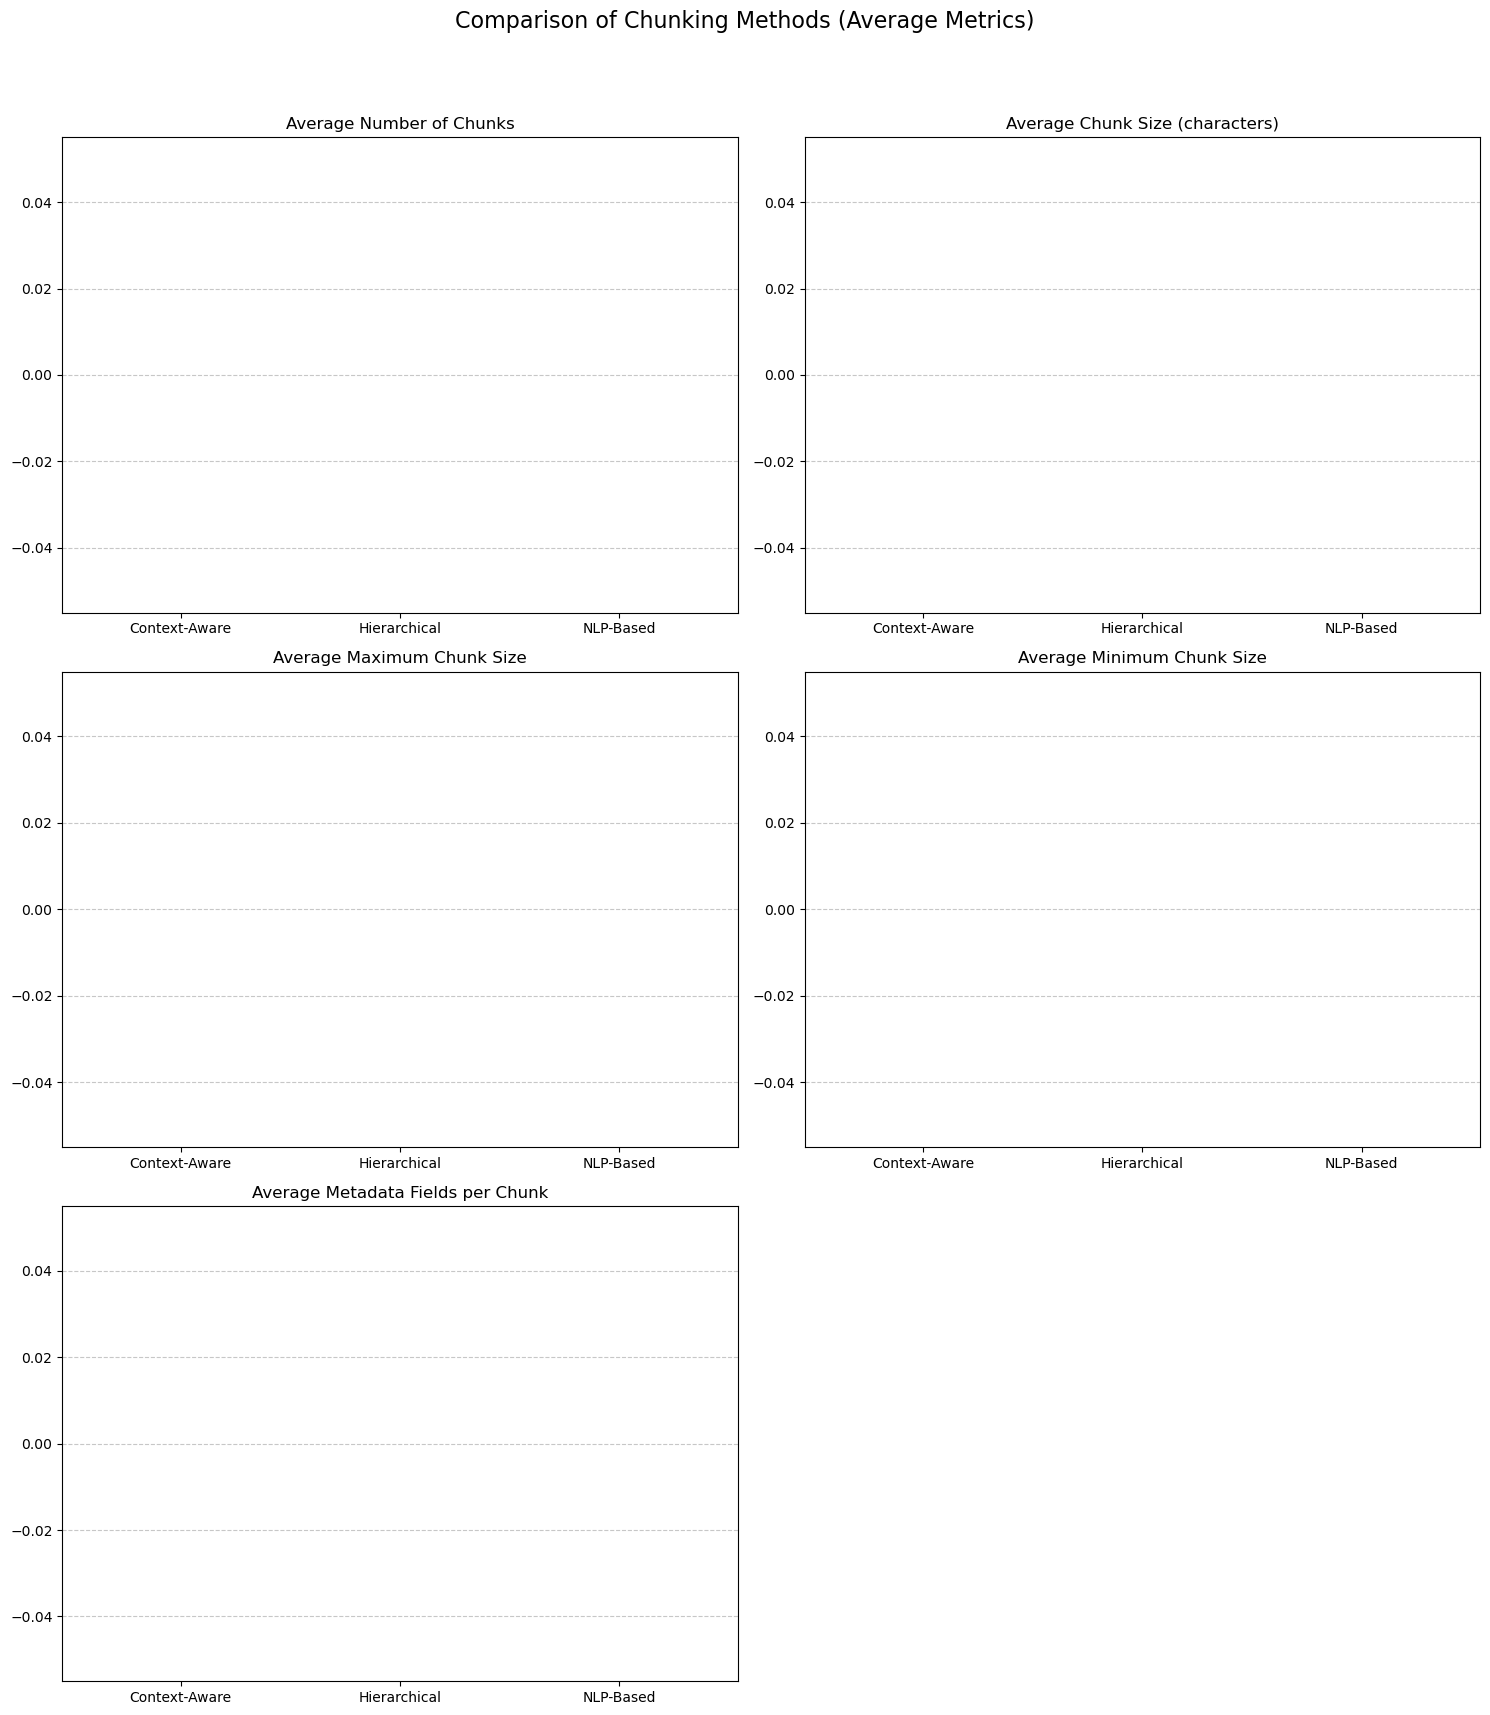

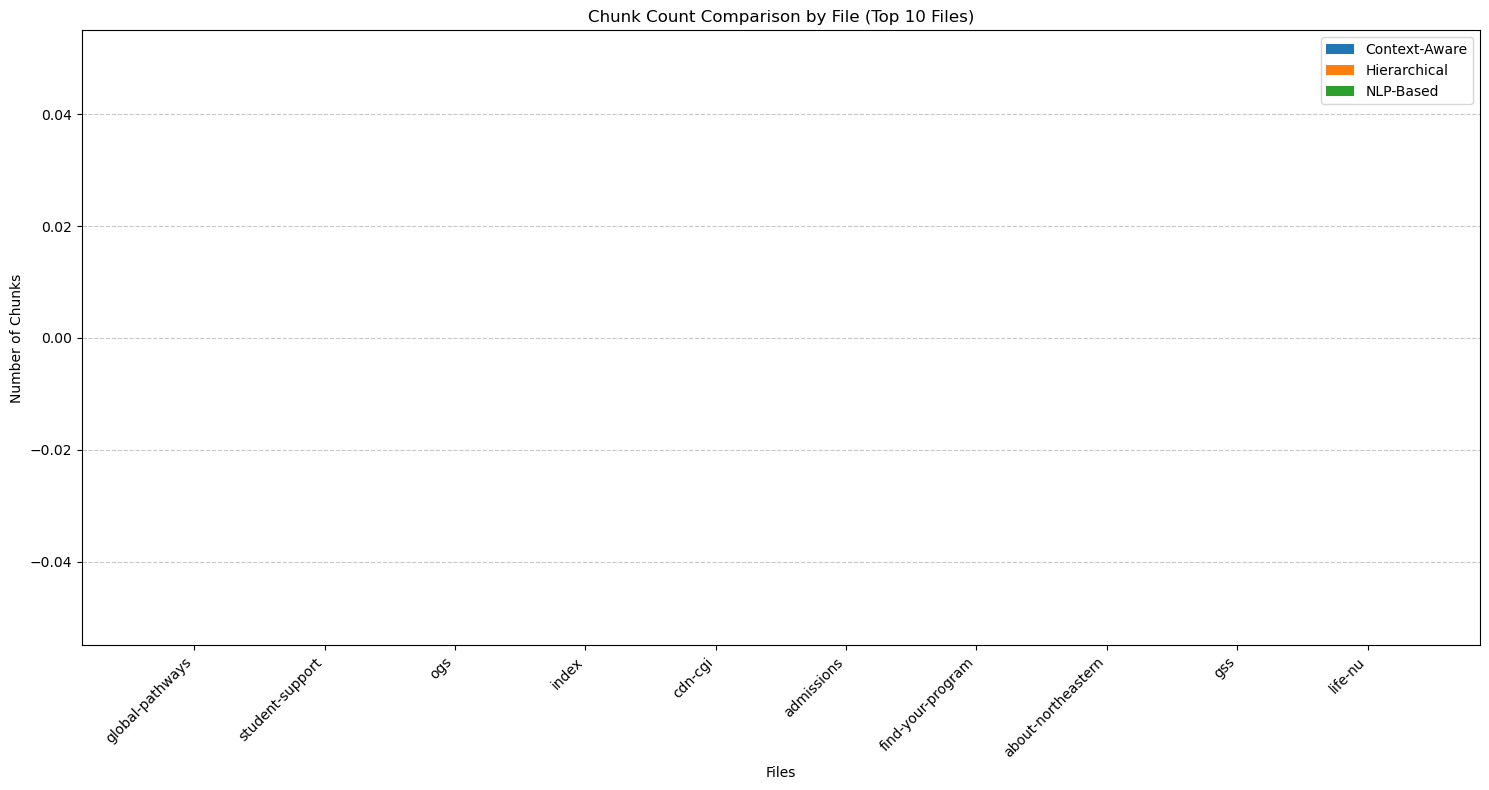

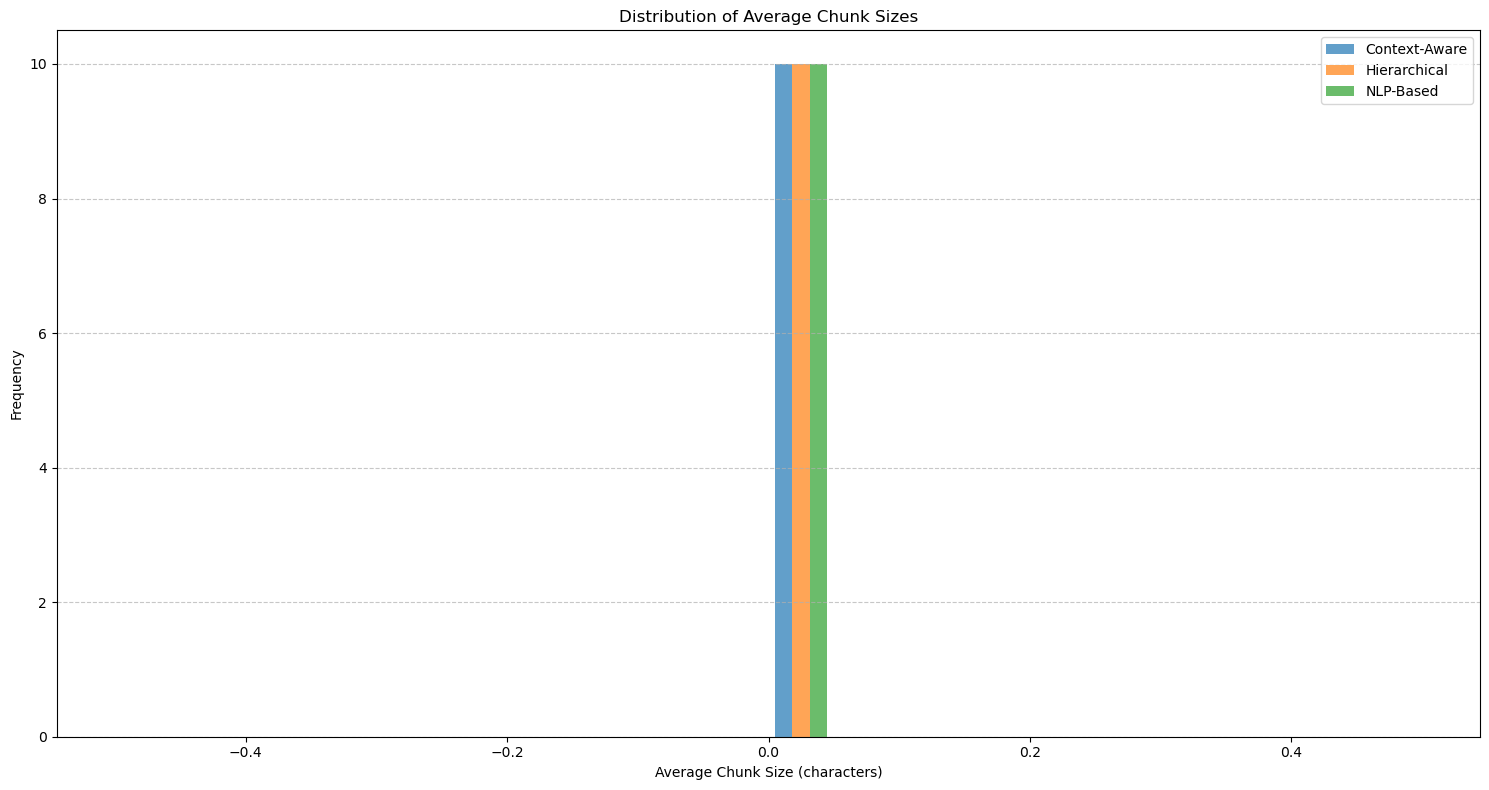

In [39]:

dir1 = "/Users/shreya/Desktop/UniQbot/chunked_pages1"
dir2 = "/Users/shreya/Desktop/UniQbot/chunked_pages2"
dir3 = "/Users/shreya/Desktop/UniQbot/chunked_pages3"
output_dir = "/Users/shreya/Desktop/UniQbot/comparison_results"
    
results_df = run_comparison(dir1, dir2, dir3, output_dir)

In [ ]:
def load_html_files(folder):
    files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.html')]
    texts = []
    for file in files:
        with open(file, "r", encoding="utf-8") as f:
            soup = BeautifulSoup(f, "html.parser")
            texts.append(soup.get_text())  # Append the raw text from the HTML file
    return texts
 
# Function to chunk the text
def chunk_text(text, max_length=512):
    words = text.split()
    return [' '.join(words[i:i+max_length]) for i in range(0, len(words), max_length)]

# Load HTML files and extract text from each
html_texts = load_html_files(html_folder)

# Chunk all texts from all HTML files
all_chunks = []
for text in html_texts:
    chunks = chunk_text(text)
    all_chunks.extend(chunks)  # Append all chunks

# Load BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

# Generate embeddings for all chunks
def get_embeddings(text_chunks):
    encoded_input = tokenizer(text_chunks, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    return model_output.pooler_output.numpy()

embeddings = get_embeddings(all_chunks)

# Store in ChromaDB
chroma_client = chromadb.Client()
collection = chroma_client.create_collection(name="html_embeddings")
for idx, emb in enumerate(embeddings):
    collection.add(embeddings=emb.tolist(), metadatas={"chunk_id": idx}, ids=str(idx))

# Store in FAISS
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings, dtype='float32'))

# Save FAISS index
faiss.write_index(index, "data/faiss_index.index")

print("Embeddings stored successfully in ChromaDB and FAISS.")

# Example query
query = "How do I apply for my I-20 form?"  # Example query
encoded_query = tokenizer(query, padding=True, truncation=True, return_tensors='pt')

# Generate the query embedding
with torch.no_grad():
    query_embedding = model(**encoded_query).pooler_output[0].numpy()  # Extract the pooled output

# Now it's ready for FAISS search
D, I = index.search(np.array([query_embedding], dtype='float32'), k=5)
print(I)  # Top 5 closest chunks

# Display the content of the top 5 most relevant chunks
for idx in I[0]:
    if idx != -1:
        print(f"Chunk ID: {idx}, Content: {all_chunks[idx]}")

In [40]:
import json
import os
import torch
from transformers import AutoModel, AutoTokenizer
import numpy as np
from tqdm import tqdm

def load_model(model_name='sentence-transformers/all-MiniLM-L6-v2'):
    """Load the pre-trained model and tokenizer"""
    print(f"Loading model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    return tokenizer, model

def mean_pooling(model_output, attention_mask):
    """Perform mean pooling on token embeddings"""
    # First element of model_output contains all token embeddings
    token_embeddings = model_output[0]
    
    # Use attention mask to avoid including padding in the average
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def generate_embeddings(chunks, tokenizer, model, max_length=512, batch_size=16):
    """Generate embeddings for a list of text chunks"""
    # Set model to evaluation mode
    model.eval()
    embeddings = []
    
    # Process chunks in batches
    for i in range(0, len(chunks), batch_size):
        batch_chunks = chunks[i:i+batch_size]
        
        # Tokenize and prepare inputs
        inputs = tokenizer(
            batch_chunks, 
            padding=True, 
            truncation=True, 
            max_length=max_length, 
            return_tensors='pt'
        )
        
        # Generate embeddings
        with torch.no_grad():
            model_output = model(**inputs)
        
        # Perform mean pooling
        sentence_embeddings = mean_pooling(model_output, inputs['attention_mask'])
        
        # Normalize embeddings
        sentence_embeddings = torch.nn.functional.normalize(sentence_embeddings, p=2, dim=1)
        
        # Convert to numpy and add to results
        batch_embeddings = sentence_embeddings.numpy()
        embeddings.extend(batch_embeddings)
    
    return np.array(embeddings)

def process_json_file(file_path, tokenizer, model, output_dir=None):
    """Process a single JSON file and generate embeddings for its chunks"""
    
    try:
        # Load the JSON file
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Extract chunks (adjust as needed based on your JSON structure)
        chunks = []
        chunk_ids = []
        
        if isinstance(data, list):
            # If data is a list of chunks
            for i, item in enumerate(data):
                if isinstance(item, dict) and 'text' in item:
                    chunks.append(item['text'])
                    chunk_ids.append(item.get('id', f'chunk_{i}'))
                elif isinstance(item, str):
                    chunks.append(item)
                    chunk_ids.append(f'chunk_{i}')
        
        elif isinstance(data, dict):
            # If data is a dictionary with chunks
            if 'chunks' in data and isinstance(data['chunks'], list):
                for i, item in enumerate(data['chunks']):
                    if isinstance(item, dict) and 'text' in item:
                        chunks.append(item['text'])
                        chunk_ids.append(item.get('id', f'chunk_{i}'))
                    elif isinstance(item, str):
                        chunks.append(item)
                        chunk_ids.append(f'chunk_{i}')
            else:
                # Extract all text values from the dictionary
                for i, (key, value) in enumerate(data.items()):
                    if isinstance(value, str):
                        chunks.append(value)
                        chunk_ids.append(key)
        
        if not chunks:
            print(f"Warning: No chunks found in {file_path}")
            return None
        
        # Generate embeddings
        embeddings = generate_embeddings(chunks, tokenizer, model)
        
        # Create a result dictionary
        result = {
            'file': os.path.basename(file_path),
            'chunks': [{'id': id, 'text': text, 'embedding': emb.tolist()} 
                      for id, text, emb in zip(chunk_ids, chunks, embeddings)]
        }
        
        # Save the result to a file if specified
        if output_dir:
            base_name = os.path.basename(file_path)
            output_name = os.path.splitext(base_name)[0] + '_embedded.json'
            output_path = os.path.join(output_dir, output_name)
            
            with open(output_path, 'w', encoding='utf-8') as f:
                json.dump(result, f, ensure_ascii=False, indent=2)
            
            return output_path
        
        return result
    
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def process_directory(input_dir, output_dir=None, model_name='sentence-transformers/all-MiniLM-L6-v2'):
    """Process all JSON files in a directory"""
    
    # Create output directory if it doesn't exist
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Load model and tokenizer (only once for all files)
    tokenizer, model = load_model(model_name)
    
    # Get all JSON files
    json_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) 
                 if f.endswith('.json') and os.path.isfile(os.path.join(input_dir, f))]
    
    if not json_files:
        print(f"No JSON files found in {input_dir}")
        return []
    
    print(f"Found {len(json_files)} JSON files to process")
    
    # Process each file
    results = []
    for file_path in tqdm(json_files, desc="Processing files"):
        result = process_json_file(file_path, tokenizer, model, output_dir)
        if result:
            if output_dir:
                results.append(result)
            else:
                results.append(result)
    
    return results

In [41]:
import os
import json
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
import numpy as np

# Define the path to your JSON files
json_folder = "/Users/shreya/Desktop/UniQbot/chunked_pages2"

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()

# Function to get BERT embeddings
def get_bert_embedding(text):
    # Add handling for empty text or None
    if not text or text.strip() == "":
        return np.zeros(768)  # Return zeros for empty text (BERT base has 768 dimensions)
    
    # Tokenize and convert to tensor
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    
    # Get embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Use the [CLS] token embedding as the sentence embedding
    embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return embeddings[0]  # Return the embedding as a numpy array

# Process each JSON file in the folder
output_folder = json_folder + "_with_embeddings"
os.makedirs(output_folder, exist_ok=True)

# Get list of JSON files
json_files = [f for f in os.listdir(json_folder) if f.endswith('.json')]

for json_file in tqdm(json_files, desc="Processing files"):
    file_path = os.path.join(json_folder, json_file)
    
    # Load JSON data
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Process data based on its structure
    # Assuming each JSON file contains a list of chunks or a single document with chunks
    if isinstance(data, list):
        # Process list of chunks
        for chunk in data:
            if isinstance(chunk, dict) and 'text' in chunk:
                chunk['embedding'] = get_bert_embedding(chunk['text']).tolist()
    elif isinstance(data, dict):
        # Process dictionary (single document)
        if 'text' in data:
            data['embedding'] = get_bert_embedding(data['text']).tolist()
        elif 'chunks' in data and isinstance(data['chunks'], list):
            for chunk in data['chunks']:
                if isinstance(chunk, dict) and 'text' in chunk:
                    chunk['embedding'] = get_bert_embedding(chunk['text']).tolist()
    
    # Save the data with embeddings
    output_path = os.path.join(output_folder, json_file)
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=2)

print(f"Completed! Embedded data saved to {output_folder}")

Processing files: 100%|██████████████████████| 356/356 [00:01<00:00, 290.26it/s]

Completed! Embedded data saved to /Users/shreya/Desktop/UniQbot/chunked_pages2_with_embeddings


In [2]:
import os
import json
from tqdm import tqdm
import chromadb
from chromadb.utils import embedding_functions

# Path to your embedded data
embedded_data_folder = "/Users/shreya/Desktop/UniQbot/chunked_pages2_with_embeddings"

# Initialize ChromaDB client
chroma_client = chromadb.PersistentClient(path="/Users/shreya/Desktop/UniQbot/vector_db")

# Create a collection in ChromaDB
# Note: We're using None for the embedding function since we already have embeddings
collection = chroma_client.create_collection(
    name="document_chunks",
    embedding_function=None,
    get_or_create=True
)

# Process each JSON file and add to vector DB
json_files = [f for f in os.listdir(embedded_data_folder) if f.endswith('.json')]

for json_file in tqdm(json_files, desc="Adding to vector database"):
    file_path = os.path.join(embedded_data_folder, json_file)
    
    # Load JSON data
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Lists to collect items for batch addition
    ids = []
    documents = []
    embeddings = []
    metadatas = []
    
    # Process data based on its structure
    chunks_to_process = []
    
    if isinstance(data, list):
        # It's a list of chunks
        chunks_to_process = data
    elif isinstance(data, dict):
        if 'chunks' in data and isinstance(data['chunks'], list):
            # It's a document with a chunks field
            chunks_to_process = data['chunks']
        else:
            # It's a single document
            chunks_to_process = [data]
    
    # Process each chunk
    for i, chunk in enumerate(chunks_to_process):
        if isinstance(chunk, dict) and 'text' in chunk and 'embedding' in chunk:
            # Create a unique ID for each chunk
            chunk_id = f"{os.path.splitext(json_file)[0]}_chunk_{i}"
            
            # Extract the text and embedding
            text = chunk['text']
            embedding = chunk['embedding']
            
            # Create metadata (optional)
            metadata = {k: v for k, v in chunk.items() 
                       if k not in ['text', 'embedding'] and not isinstance(v, (dict, list))}
            
            # Add source file to metadata
            metadata['source_file'] = json_file
            
            # Add to our batch lists
            ids.append(chunk_id)
            documents.append(text)
            embeddings.append(embedding)
            metadatas.append(metadata)
    
    # Add chunks to the collection in batches
    if ids:
        # ChromaDB expects embeddings as a list of lists of floats
        collection.add(
            ids=ids,
            documents=documents,
            embeddings=embeddings,
            metadatas=metadatas
        )

print(f"Successfully added {collection.count()} chunks to the vector database.")

# Example query to test the vector database
def query_vector_database(query_text, query_embedding, n_results=5):
    """
    Query the vector database with a text and its embedding.
    
    Note: In a real application, you would need to generate the embedding
    for the query_text using the same model you used for the documents.
    """
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=n_results
    )
    
    return results

# You can implement a test query if needed
# Here's a placeholder for how you might do it:
# query = "Your test query here"
# query_embedding = get_bert_embedding(query).tolist()  # You would need to import the embedding function
# results = query_vector_database(query, query_embedding)
# print(results)

Adding to vector database: 100%|█████████████| 356/356 [00:00<00:00, 924.48it/s]

Successfully added 0 chunks to the vector database.
